# CORNER TRANSFER matrix

Following the great tutorial by Philippe Corboz [pdf](https://nextcloud.tfk.ph.tum.de/etn/wp-content/uploads/2018/11/Philippe_Corboz.pdf)

## Local Boltzmann weight

We start by defining the local Boltzmann weight
$$M(i,j) = \exp(-\beta(-\sigma_i \sigma_j - 0.5 h(\sigma_i +\sigma_j)))$$


## Local Tensor
 We now build the elementary four legs tensor $$T$$ we will use for the contraction using the Boltzman weight and the copy tensor as in the left part of the figure, we will define a function that accepts two arguments $\beta, h$
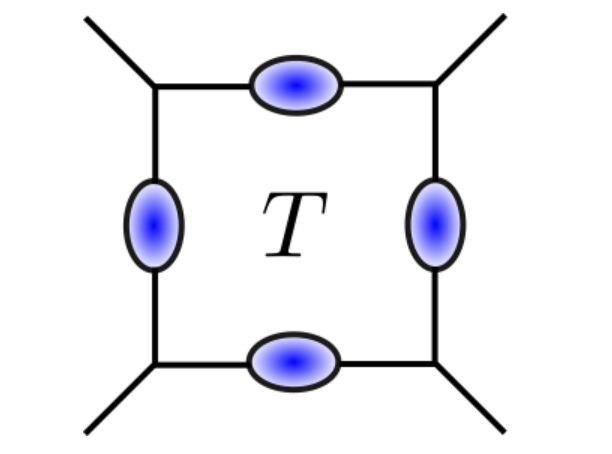

## Building blocks
Now  we need to code the two functions that perform the contraction of the partition function and the numerator for the magnetization, 
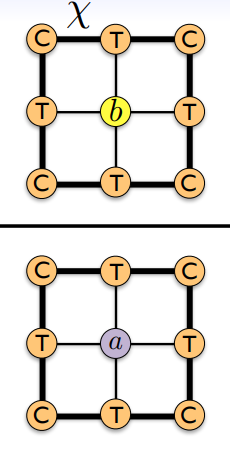

*** In this plot $$ a=T $$ of the previous figure
 $$C$$ and $$T$$,can be initialized as slices of $a$ as if some of the boundary spins of $a$, where set to $\uparrow$ (corresponding to the state $0$)
 
 we define two functions, one that compute the numerator and the other the denominator. The first will accept as input $ C, T, a$ while the second also requires $b$, as an alternative we can define also a function that compute both numerator and denominator and takes the ratio, to directly returnt the magnetization

## One step

Now the core of the CTM algortihm is to renormalize the $C$ and $T$ until a fixed point is obtained. 
This is done by absorbing at each step an extra $a$ into $C$ and $T$ and then truncating the resulting tensor so that their size is upperbounded by maximal bond dimension 
$$\chi \le \chi_{max}$$

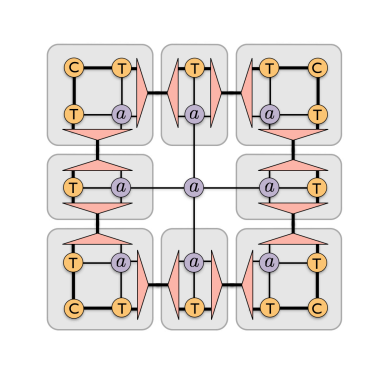

The recipy to project back is based on the spectrum of the CTM $C$

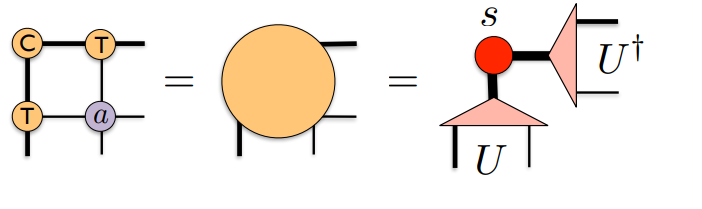

For stability reasons, it is important to keep norms and tensor bounded (by finding an adequate normalization step) and to keep the corner symmetric, such that one can use an eigenvalue decomposition rather than an svd. 

The projector thus project on the largest eigenvalues of the corner 

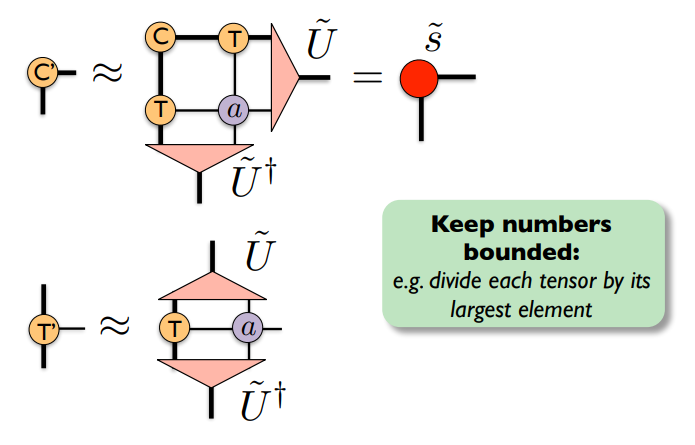

The function that perfrom such step requires, $C$, $T$, $a$, $d$,the size of $a$ $\chi$,the size of the corner $\chi_{max}$, the maximal size of the corner, d_tol, the cutoff on the eigenvalues. 

The size of the corner will grow up to $\chi_{max}$ by including all eigenvalues of the corner up to d_tol, the new chi should also be returned

In order to compare with the exact result we need to compute also the exact magnetization for $\beta\ge \beta_c$ given by 
$$M = \left[ 1 - \sinh^{-4}(2 \beta) \right]^{1/8}$$ 



In [ ]:


def exact_mag(beta):
    return (1 - np.sinh(2*beta)**(-4))**(1/8)

# All together, several iterations

Now we can put all together, since the CTM is an iterative method one should take care about the convergence, by e.g. tracking the magnetization and repeating the algorithm untill it stop changing (up to a desired accuracy). For simplicity here we will fix the number of iteration to 100 and run the program for different $\beta$. 

## Plot the phase diagram

You can now collect the results of the magnetization and plot them as a function of the inverse temperature $\beta$, comparing (above the critical point) with the exact result. 

## The critical point

You can try to see what happens at the critical point (or close to it) if you increase the bond dimension



## Finite entanglement scaling 
And plot the deviation from the exact magnetization in log-log scale with respect to the bond dimension $\chi$ to unveil the ***finite entanglement scaling***